## Load NASBench library and dataset

In [1]:
from nasbench import api

# Use nasbench_full.tfrecord for full dataset 
nasbench = api.NASBench('D:\\Data\\nasbench_only108.tfrecord')

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 30 seconds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


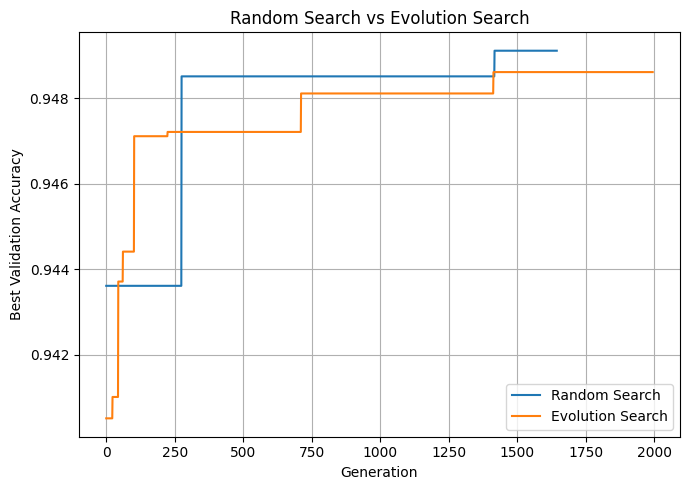

In [42]:
# 方法1a：自动重载（推荐）
%load_ext autoreload
%autoreload 2
from search import randomSearch,evolutionSearch,BOSearch,SASearch
import matplotlib.pyplot as plt
rSearch=SASearch(nasbench)
EASearch=evolutionSearch(nasbench)
times_r, best_valid_r, best_test_r = rSearch.run()
times_e, best_valid_e, best_test_e = EASearch.run(crossover=False)

skip = 5
max_gen = 2000  # 只画前 2000 代

# ---- 预处理：跳过前5代，只取前2000 ----
vals_r = best_valid_r[skip:max_gen]
vals_e = best_valid_e[skip:max_gen]

# 生成横坐标（就是 index）
x_r = list(range(len(vals_r)))
x_e = list(range(len(vals_e)))

# ---- 作图 ----
plt.figure(figsize=(7,5))

plt.plot(x_r, vals_r, label="Random Search", linewidth=1.5)
plt.plot(x_e, vals_e, label="Evolution Search", linewidth=1.5)

plt.xlabel("Generation") 
plt.ylabel("Best Validation Accuracy")
plt.title("Random Search vs Evolution Search")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:

# 运行随机搜索和进化搜索各10次。这应该需要几分钟时间。
# 注意，如果数据集不是预先计算好的，每次运行都需要几天的计算时间来实际训练和评估。

random_data = []
evolution_data = []
for repeat in range(10):
  print('Running repeat %d' % (repeat + 1))
  times, best_valid, best_test = rSearch.run()
  
  random_data.append((times, best_valid, best_test))

  times, best_valid, best_test = EASearch.run()
  evolution_data.append((times, best_valid, best_test))

Running repeat 1
Running repeat 2
Running repeat 3
Running repeat 4
Running repeat 5
Running repeat 6
Running repeat 7
Running repeat 8
Running repeat 9
Running repeat 10


Text(0.5, 1.0, 'Evolution search trajectories (red=validation, blue=test)')

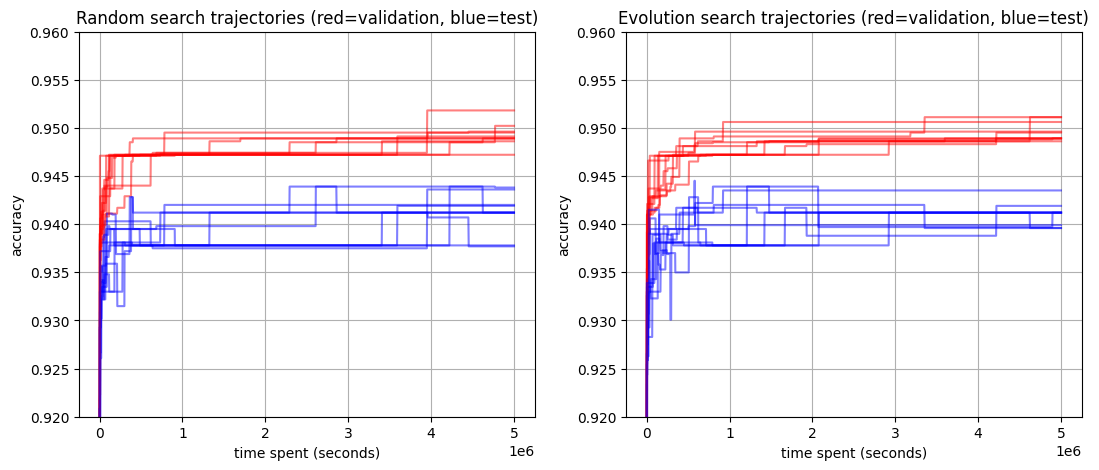

In [4]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
for times, best_valid, best_test in random_data:
  plt.plot(times, best_valid, label='valid', color='red', alpha=0.5)
  plt.plot(times, best_test, label='test', color='blue', alpha=0.5)

plt.ylabel('accuracy')
plt.xlabel('time spent (seconds)')
plt.ylim(0.92, 0.96)
plt.grid()
plt.title('Random search trajectories (red=validation, blue=test)')


plt.subplot(1, 3, 2)
for times, best_valid, best_test in evolution_data:
  plt.plot(times, best_valid, label='valid', color='red', alpha=0.5)
  plt.plot(times, best_test, label='test', color='blue', alpha=0.5)

plt.ylabel('accuracy')
plt.xlabel('time spent (seconds)')
plt.ylim(0.92, 0.96)
plt.grid()
plt.title('Evolution search trajectories (red=validation, blue=test)')

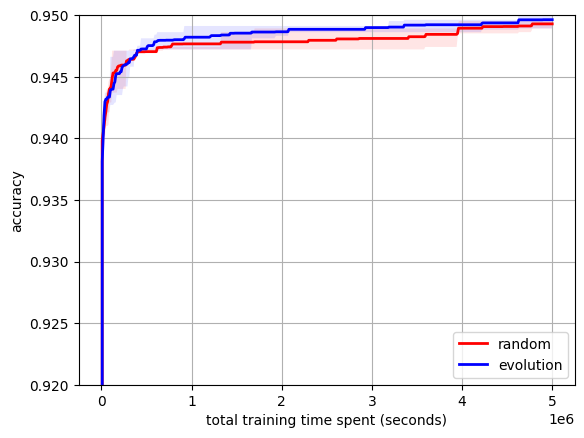

In [5]:
from plot import plot_data
 
plot_data(random_data, 'red', 'random')
plot_data(evolution_data, 'blue', 'evolution')
plt.legend(loc='lower right')
plt.ylim(0.92, 0.95)
plt.xlabel('total training time spent (seconds)')
plt.ylabel('accuracy')
plt.grid()